<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
# Install the required packages using pip
!pip install numpy
!pip install pandas
!pip install seaborn


We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [8]:
import pandas as pd

# Define the path to the file
file_path = r'D:\06_CONTINUOUS LEARNING\01-DATA SCIENTIST\IBM Data Science-Coursera\10_Data Science Capstone Project\week04\data.CSV'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


   Unnamed: 0  FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0           0             1  2010-06-04       Falcon 9  6104.959412   LEO   
1           1             2  2012-05-22       Falcon 9   525.000000   LEO   
2           2             3  2013-03-01       Falcon 9   677.000000   ISS   
3           3             4  2013-09-29       Falcon 9   500.000000    PO   
4           4             5  2013-12-03       Falcon 9  3170.000000   GTO   

     LaunchSite      Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  CCAFS SLC 40    None None        1     False   False  False        NaN   
1  CCAFS SLC 40    None None        1     False   False  False        NaN   
2  CCAFS SLC 40    None None        1     False   False  False        NaN   
3   VAFB SLC 4E  False Ocean        1     False   False  False        NaN   
4  CCAFS SLC 40    None None        1     False   False  False        NaN   

   Block  ReusedCount Serial   Longitude   Latitude  Class  
0    1.0     

In [15]:
import pandas as pd

# Define the path to the file
file_path = r'D:\06_CONTINUOUS LEARNING\01-DATA SCIENTIST\IBM Data Science-Coursera\10_Data Science Capstone Project\week04\X.CSV'

# Load the CSV file into a DataFrame
X= pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(X.head(100))

    Unnamed: 0  FlightNumber   PayloadMass  Flights  Block  ReusedCount  \
0            0           1.0   6104.959412      1.0    1.0          0.0   
1            1           2.0    525.000000      1.0    1.0          0.0   
2            2           3.0    677.000000      1.0    1.0          0.0   
3            3           4.0    500.000000      1.0    1.0          0.0   
4            4           5.0   3170.000000      1.0    1.0          0.0   
..         ...           ...           ...      ...    ...          ...   
85          85          86.0  15400.000000      2.0    5.0          2.0   
86          86          87.0  15400.000000      3.0    5.0          2.0   
87          87          88.0  15400.000000      6.0    5.0          5.0   
88          88          89.0  15400.000000      3.0    5.0          2.0   
89          89          90.0   3681.000000      1.0    5.0          0.0   

    Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  ...  Serial_B1058  \
0           0.0        0.0  

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
import numpy as np

# Extracting the 'Class' column as a Pandas Series
class_series = data['Class']

# Converting the Series to a NumPy array
Y = class_series.to_numpy()

# Display the first few elements of the array to verify
print(Y[:5])


[0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [16]:
from sklearn import preprocessing
import pandas as pd

# Ensure X is a DataFrame, or reload/recreate it as a DataFrame
# For example, if you have code that originally created X, make sure it runs before this point.

# Create a StandardScaler object
scaler = preprocessing.StandardScaler()

# Save the original column names from the DataFrame X
column_names = X.columns

# Fit and transform the data in DataFrame X
X_scaled = scaler.fit_transform(X)

# Convert the NumPy array back to a DataFrame using the saved column names
X = pd.DataFrame(X_scaled, columns=column_names)

# Display the first few rows of the standardized DataFrame
print(X.head())


   Unnamed: 0  FlightNumber   PayloadMass   Flights     Block  ReusedCount  \
0   -1.712912     -1.712912 -1.948145e-16 -0.653913 -1.575895     -0.97344   
1   -1.674419     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344   
2   -1.635927     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344   
3   -1.597434     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344   
4   -1.558942     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344   

   Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  ...  Serial_B1058  \
0       -0.106     -0.106  -0.654654     -0.106  ...     -0.185695   
1       -0.106     -0.106  -0.654654     -0.106  ...     -0.185695   
2       -0.106     -0.106  -0.654654     -0.106  ...     -0.185695   
3       -0.106     -0.106  -0.654654     -0.106  ...     -0.185695   
4       -0.106     -0.106   1.527525     -0.106  ...     -0.185695   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0     -0.215666     -0.185695   

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Optionally, display the shapes of the outputs to confirm the split
print("Training data shape (X_train):", X_train.shape)
print("Test data shape (X_test):", X_test.shape)
print("Training labels shape (Y_train):", Y_train.shape)
print("Test labels shape (Y_test):", Y_test.shape)


Training data shape (X_train): (72, 84)
Test data shape (X_test): (18, 84)
Training labels shape (Y_train): (72,)
Test labels shape (Y_test): (18,)


we can see we only have 18 test samples.


In [18]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
lr = LogisticRegression()

# Parameters dictionary for GridSearchCV
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create a GridSearchCV object with the logistic regression model
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit GridSearchCV to the training data
logreg_cv.fit(X_train, Y_train)

# Display the best hyperparameters and the accuracy of the best model
print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy on validation data: ", logreg_cv.best_score_)


Tuned hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data:  0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [23]:
# Calculate the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Print the accuracy on the test data
print("Accuracy on test data: ", test_accuracy)


Accuracy on test data:  0.8333333333333334


Lets look at the confusion matrix:


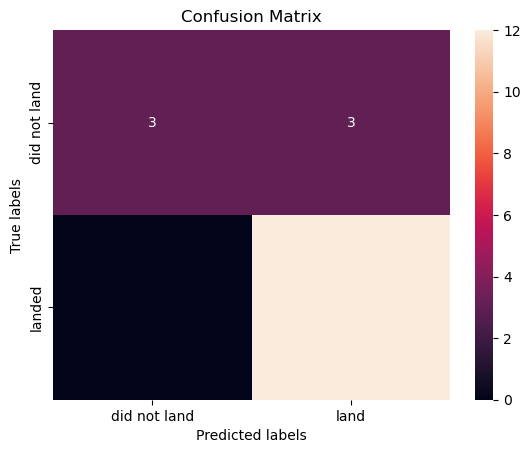

In [24]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the support vector machine model
svm = SVC()

# Parameters dictionary for GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create a GridSearchCV object with the support vector machine model
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit GridSearchCV to the training data
svm_cv.fit(X_train, Y_train)

# Display the best hyperparameters and the accuracy of the best model
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy on validation data: ", svm_cv.best_score_)


Tuned hyperparameters (best parameters):  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy on validation data:  0.8214285714285714


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [28]:
# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)

# Print the accuracy on the test data
print("Accuracy on test data: ", test_accuracy)


Accuracy on test data:  0.8333333333333334


We can plot the confusion matrix


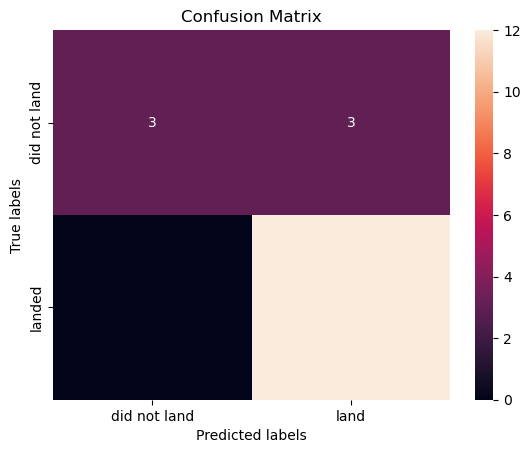

In [29]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_depth': [2, 4, 6],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 5]
}


In [33]:
tree_cv = GridSearchCV(tree, parameters, cv=10, verbose=3)  # Increase verbosity level
tree_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.625 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.571 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=1.000 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.714 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'splitter': ['best']},
             verbose=3)

In [44]:
print("Starting Grid Search...")
tree_cv.fit(X_train, Y_train)
print("Grid Search Complete.")


Starting Grid Search...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=1.000 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.714 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.714 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.857 total time=   0.0s
[CV 7/10] END c

In [35]:
small_parameters = {
    'criterion': ['gini'],
    'max_depth': [2]
}
small_tree_cv = GridSearchCV(tree, small_parameters, cv=2, verbose=2)
small_tree_cv.fit(X_train, Y_train)
print("Small Grid Search Complete.")
print("Best parameters: ", small_tree_cv.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
Small Grid Search Complete.
Best parameters:  {'criterion': 'gini', 'max_depth': 2}


In [ ]:
# Expanding the parameter grid slightly more than the small test
expanded_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 5]
}

# Using more cross-validation folds than the smallest test, but fewer than the original large grid
expanded_tree_cv = GridSearchCV(tree, expanded_parameters, cv=5, verbose=3)  # Moderate verbosity
expanded_tree_cv.fit(X_train, Y_train)
print("Expanded Grid Search Complete.")
print("Best parameters: ", expanded_tree_cv.best_params_)
print("Accuracy on validation data: ", expanded_tree_cv.best_score_)


#Expanded Grid Search Complete.
#Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy on validation data:  0.8885714285714286


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [38]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data: ", test_accuracy)


Accuracy on test data:  0.8333333333333334


We can plot the confusion matrix


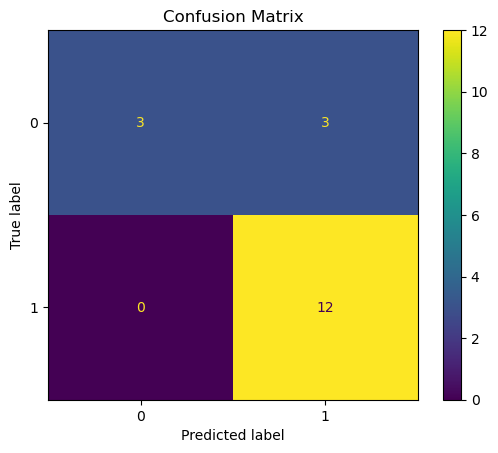

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the test set results
yhat = tree_cv.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, yhat)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the K-Nearest Neighbors classifier
KNN = KNeighborsClassifier()

# Parameters dictionary for GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 11)),  # Using a list of neighbors from 1 to 10
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 corresponds to Manhattan distance, 2 to Euclidean distance
}

# Create a GridSearchCV object with the KNN model
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit GridSearchCV to the training data
knn_cv.fit(X_train, Y_train)

# Display the best hyperparameters and the accuracy of the best model
print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print("Accuracy on validation data: ", knn_cv.best_score_)


Tuned hyperparameters (best parameters):  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy on validation data:  0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [42]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy on the test data
print("Accuracy on test data: ", test_accuracy)


Accuracy on test data:  0.8333333333333334


We can plot the confusion matrix


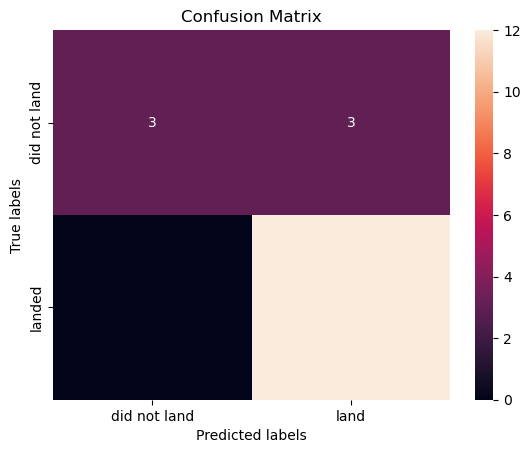

In [43]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


<h2>All models have the same test accuracy of 0.8333, which suggests that they are equally effective on the test set. However, when considering the validation accuracy, the Decision Tree model shows a slightly higher validation accuracy of 0.8886, making it the best model in terms of generalizing well on unseen data from the validation set. Thus, based on the information available, the Decision Tree model is comparatively best. 

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
